# Key Factors Influencing Road Accidents in Belgium and Policies for Mitigation

#### Jérémy Martin
#### 2025-03-15

## Install Environment

Before going into the project, make sure to run the following code:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import math
from data_exploratory import dataset_info
from data_visualisation import plot_accidents_by_day
from data_visualisation import plot_avg_accidents_weekday_vs_weekend
from data_visualisation import plot_accidents_by_road_type
from data_visualisation import plot_accidents_by_hour
from data_visualisation import plot_accidents_by_light_condition
from data_visualisation import plot_accident_severity_by_light_condition
from regression import compare_models_aic
from regression import likelihood_ratio_test
from regression import compute_pseudo_r2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from regression import compute_vif

## Introduction

### The Global Burden of Road Accidents

Road traffic accidents are a significant public health and economic issue worldwide. According to the World Health Organization (*WHO, 2023*), approximately **1.35 million people** die each year as a result of road crashes, and between **20 to 50 million** more suffer non-fatal injuries, often resulting in long-term disabilities.

Beyond the human cost, road accidents impose **substantial economic burdens**, estimated at **3% of global GDP** due to medical expenses, loss of productivity, and infrastructure damage (*WHO, 2023*). These challenges are particularly pressing in urbanized and densely populated countries, where increasing vehicle ownership and traffic congestion contribute to road safety risks.

In Europe, road safety policies have successfully reduced fatalities over the past two decades, yet disparities remain between countries and regions. Belgium, as a Western European country with a highly developed road network, faces **persistent challenges** in reducing traffic accidents, particularly in urban areas and among vulnerable road users.

### Road Accidents in Belgium: The Need for Data-Driven Policies

Belgium has made considerable progress in road safety, but the Federal Public Service (FPS) for Mobility and Transport reported that in 2022, road accidents still resulted in **over 50,000 injuries and fatalities**. Despite strict traffic regulations, factors such as speeding, road conditions, weather conditions, time of day, and collision type continue to play a role in accident severity.

Understanding these determinants is essential for designing effective traffic regulations, road infrastructure improvements, and targeted enforcement strategies. Policymakers require **empirical, data-driven research** to optimize resources and implement measures that **maximize road safety impact**.

### Literature Review: Key Factors affecting Road Accidents

The study of road accidents has been an essential area of research in transportation safety, with scholars investigating the various factors that contribute to accident occurrence and severity. The literature identifies multiple key determinants, including time of occurrence, road conditions, collision type, driver impairment, and methodological approaches to accident modeling.

One of the most well-documented factors influencing accident severity is the time of occurrence, particularly differences between daytime and nighttime crashes. Research has consistently shown that nighttime and weekend accidents tend to be more severe due to reduced visibility, higher speeds, and increased incidence of impaired driving. Studies have found that impaired vision and fatigue at night lead to delayed reaction times, which can exacerbate the severity of crashes. Moreover, peak traffic congestion during rush hours contributes to a high frequency of accidents, although these tend to be less severe compared to high-speed crashes occurring at night (*Elvik, 2013*).

Road and environmental conditions also play a significant role in both accident frequency and severity. Highways and regional roads, due to their higher speed limits, often experience more severe crashes, whereas urban roads tend to have a higher frequency of accidents but lower severity due to reduced speeds and greater congestion. Research suggests that well-lit roads help mitigate accident risks, particularly at night, as street lighting has been shown to significantly reduce crash rates and improve driver visibility (*Sullivan & Flannagan, 2002*). In contrast, adverse weather conditions such as rain and fog increase accident risks due to reduced traction and limited visibility, leading to a greater likelihood of multi-vehicle collisions.

Another critical determinant is collision type, as different types of crashes exhibit varying levels of severity. Studies indicate that head-on collisions and side-impact crashes result in the highest fatality rates, whereas rear-end crashes, while frequent, are generally less severe due to lower impact forces (*Zou et al., 2017*). The nature of the collision is closely related to road design, with intersections being high-risk locations for side-impact crashes, while highways experience more frontal collisions due to overtaking and high-speed maneuvers.

The state of the driver is an equally important factor in accident severity. Alcohol consumption has been widely recognized as a leading contributor to road fatalities, as intoxicated drivers exhibit reduced cognitive abilities, slower reaction times, and impaired motor control. Studies show that the risk of severe injury or death increases significantly with higher blood alcohol concentrations, reinforcing the importance of strict drink-driving laws and enforcement (*WHO, 2023*). Beyond alcohol, other impairments such as fatigue, drowsiness, and medical conditions have also been found to influence accident risk. Research highlights that drivers with certain health conditions, such as sleep apnea or neurological disorders, are more likely to be involved in high-severity crashes, emphasizing the need for regular medical screenings for at-risk individuals (*Haque et al., 2012*).

In terms of statistical methodologies, **Poisson and Negative Binomial regression models** have been widely used in road accident analysis due to their suitability for **count data**. Poisson regression is particularly useful when modeling accident frequencies, as it assumes that the mean and variance of accident counts are equal, making it an appropriate choice when analyzing crash occurrence rates. However, when overdispersion is present (meaning the variance exceeds the mean), Negative Binomial regression is preferred as it accounts for additional variability in accident data (*Lord et al., 2005*). **Logistic regression models** have also been frequently applied to predict accident severity, particularly when categorizing outcomes as fatal or non-fatal. The choice of statistical model is crucial for deriving reliable insights, as improper modeling can lead to biased estimates and incorrect policy implications.

This literature review establishes that road accidents are a **multifaceted issue** influenced by temporal, environmental, vehicular, and human factors. It also underscores the importance of appropriate statistical modeling in drawing meaningful conclusions from accident data.

Despite extensive research on road accidents, gaps remain in the literature, particularly in region-specific studies analyzing localized traffic patterns and risk factors. In the Belgian context, there is a need for empirical research examining how road type, time of occurrence, and collision type interact to influence accident frequency. This study seeks to answer the following research question: *What are the key factors influencing the occurrence of road accidents in Belgium, and how do these factors affect accident risk?*

By leveraging empirical evidence from actual accident reports, this research will assist policymakers, urban planners, and law enforcement agencies in designing targeted interventions to reduce the incidence of road accidents in Belgium.

### Research Question & Objectives of this Study

Despite extensive research on road accidents, gaps remain in the literature, particularly in region-specific studies analyzing localized traffic patterns and risk factors. In the Belgian context, there is a need for empirical research examining how road type, time of occurrence, and collision type interact to influence accident frequency. This study seeks to answer the following research question: *What are the key factors influencing the occurrence of road accidents in Belgium, and how do these factors affect accident risk?*

By leveraging empirical evidence from actual accident reports, this research will assist policymakers, urban planners, and law enforcement agencies in designing targeted interventions to reduce the incidence of road accidents in Belgium.

### Overview of Datas

The dataset used in this study is the *TF_ACCIDENTS_2023* open dataset from the official statistics website of the Belgian government. It contains detailed records of road accidents that occurred in Belgium in 2023, providing crucial information on the time, location, road conditions, collision types, and severity of accidents. This makes it highly relevant for analyzing the factors influencing accident frequency.

Given the research question, this dataset is particularly suitable as it enables the examination of accident occurrence patterns and the assessment of how environmental and temporal factors contribute to road safety risks.

## Data Exploration & Preparation

As mentionned, the dataset used in this study is the *TF_ACCIDENTS_2023* dataset, which provides a comprehensive record of road accidents that occurred in Belgium in 2023. The data is sourced from the official statistics website of the Belgian government, ensuring reliability and consistency in accident reporting. It contains **36,689 observations**, making it a robust dataset for analyzing accident frequency and identifying key risk factors.

This dataset include a wide range of variables (35) that capture different aspects of each recorded accident. Key variables include:

- **Temporal Factors:** *DT_HOUR* (hour of the accident), *CD_DAY_OF_WEEK* (day of the week), and *FL_WEEKEND* (indicator for weekend accidents).
- **Road and Environmental Conditions:** *CD_ROAD_TYPE* (type of road where the accident occurred), *CD_LIGHT_CONDITION* (lighting conditions at the time of the accident).
- **Collision Characteristics:** *CD_COLLISION_TYPE* (type of collision, e.g., frontal, rear-end, side-impact).
- **Accident Severity Indicators:** *MS_ACCT* (total number of recorded accidents).

Given the dataset’s granularity, it enables a detailed examination of accident patterns, allowing for the identification of high-risk periods, locations, and road conditions.

### Exploratory Data Analysis

Let's import our dataset.

In [2]:
d = pd.read_excel("TF_ACCIDENTS_2023.xlsx")

In [3]:
dataset_info(d)

Number of rows: 36689
Number of columns: 35

Column names:
['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_FR', 'TX_DAY_OF_WEEK_DESCR_NL', 'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'TX_BUILD_UP_AREA_DESCR_FR', 'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_NL', 'TX_COLL_TYPE_DESCR_FR', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL', 'TX_LIGHT_COND_DESCR_FR', 'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'TX_ROAD_TYPE_DESCR_FR', 'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_NL', 'TX_MUNTY_DESCR_FR', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL', 'TX_ADM_DSTR_DESCR_FR', 'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'TX_PROV_DESCR_FR', 'CD_RGN_REFNIS', 'TX_RGN_DESCR_NL', 'TX_RGN_DESCR_FR', 'MS_ACCT', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ'] 

Data types:
DT_DAY                       datetime64[ns]
DT_HOUR                               int64
CD_DAY_OF_WEEK                        int64
TX_DAY_OF_WEEK_DESCR_FR              object
TX

The dataset primarily consists of categorical variables, which are already encoded in distinct columns. These variables are provided in both French and Dutch, as both languages are spoken in Belgium. To begin the assessment of this database, we will remove the Dutch columns to make it more lightweight.

In [4]:
d_french = d.loc[:, ~d.columns.str.endswith("NL")]

In [5]:
dataset_info(d_french)

Number of rows: 36689
Number of columns: 26

Column names:
['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_FR', 'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_FR', 'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_FR', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_FR', 'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_FR', 'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_FR', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_FR', 'CD_PROV_REFNIS', 'TX_PROV_DESCR_FR', 'CD_RGN_REFNIS', 'TX_RGN_DESCR_FR', 'MS_ACCT', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ'] 

Data types:
DT_DAY                       datetime64[ns]
DT_HOUR                               int64
CD_DAY_OF_WEEK                        int64
TX_DAY_OF_WEEK_DESCR_FR              object
CD_BUILD_UP_AREA                    float64
TX_BUILD_UP_AREA_DESCR_FR            object
CD_COLL_TYPE                        float64
TX_COLL_TYPE_DESCR_FR                object
CD_LIGHT_COND                       float6

The dataset now contains 26 variables instead of 35. A dictionary listing the correspondence between categorical variables and their encoded meanings is provided in **Appendix 1**.

Since our sample is large enough, we will remove any observations with missing values in at least one variable to ensure the continuity of the analysis.

In [6]:
d_clean = d_french.dropna()

In [7]:
dataset_info(d_clean)

Number of rows: 25279
Number of columns: 26

Column names:
['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_FR', 'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_FR', 'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_FR', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_FR', 'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_FR', 'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_FR', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_FR', 'CD_PROV_REFNIS', 'TX_PROV_DESCR_FR', 'CD_RGN_REFNIS', 'TX_RGN_DESCR_FR', 'MS_ACCT', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ'] 

Data types:
DT_DAY                       datetime64[ns]
DT_HOUR                               int64
CD_DAY_OF_WEEK                        int64
TX_DAY_OF_WEEK_DESCR_FR              object
CD_BUILD_UP_AREA                    float64
TX_BUILD_UP_AREA_DESCR_FR            object
CD_COLL_TYPE                        float64
TX_COLL_TYPE_DESCR_FR                object
CD_LIGHT_COND                       float6

The dataset now contains 25,279 observations instead of 36,689.

### Visualisation

Let’s now assess the dataset we have.

We will first examine the variation in the number of accidents per day of the week to identify potential trends:

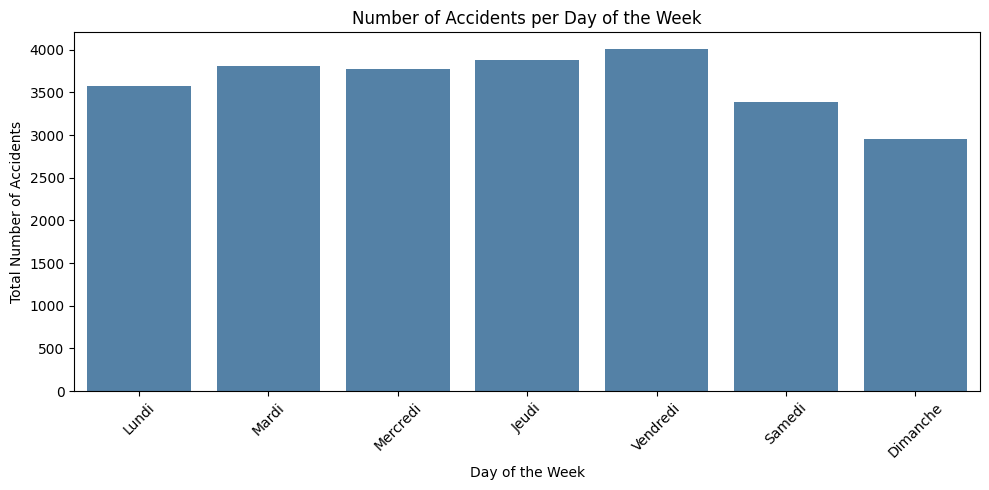

In [8]:
plot_accidents_by_day(
    df=d_clean,
    day_col="TX_DAY_OF_WEEK_DESCR_FR",
    value_col="MS_ACCT"
)

Even though we observe a slight decrease in the number of deaths occurring during the weekend (Saturday and Sunday) compared to weekdays, the difference is not significant. This may be explained by the fact that people go out less during the weekend and, more importantly, do not work, leading to fewer long-distance trips and, consequently, reduced road usage.

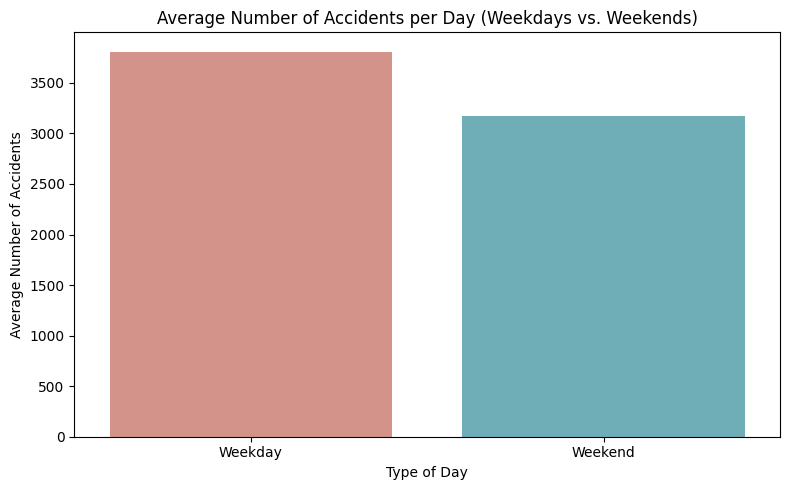

In [9]:
plot_avg_accidents_weekday_vs_weekend(
    df=d_clean,
    day_col="TX_DAY_OF_WEEK_DESCR_FR",
    value_col="MS_ACCT"
)

This graph suggests the following main hypothesis: car accidents occur more frequently on weekdays than on weekends due to commuting-related travel. To verify this assumption, we will analyze the number of accidents by road type, considering that the dataset distinguishes between two road types:
- **Regional or rural roads**, primarily used for daily commuting;
- **Highways**, mainly used for long-distance travel.

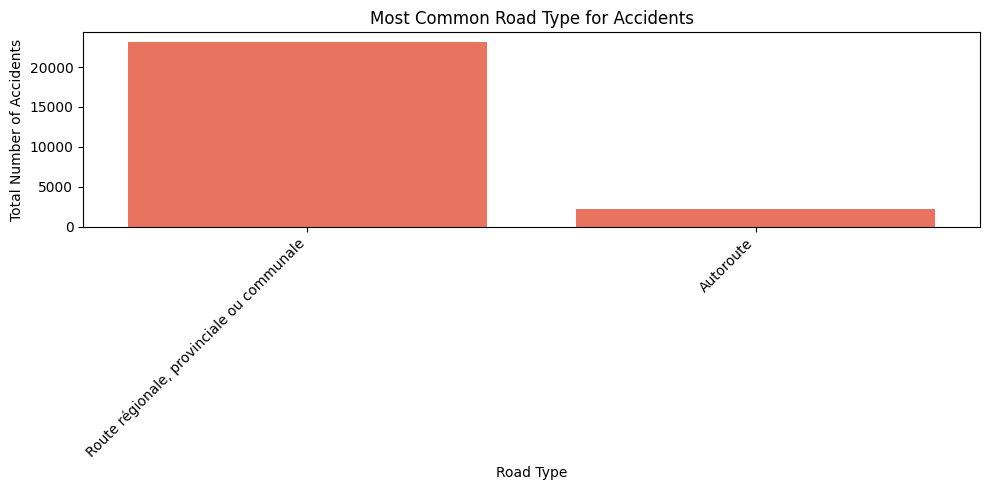

In [10]:
plot_accidents_by_road_type(
    df=d_clean,
    road_col="TX_ROAD_TYPE_DESCR_FR",
    value_col="MS_ACCT"
)

The results are clear: car accidents occur significantly more often on regional or rural roads than on highways. This finding confirms our intuition that car accidents are more likely to happen during daily commutes rather than long-distance travel.

To further investigate the link between car accidents and commuting, let’s analyze the number of accidents per hour of the day.

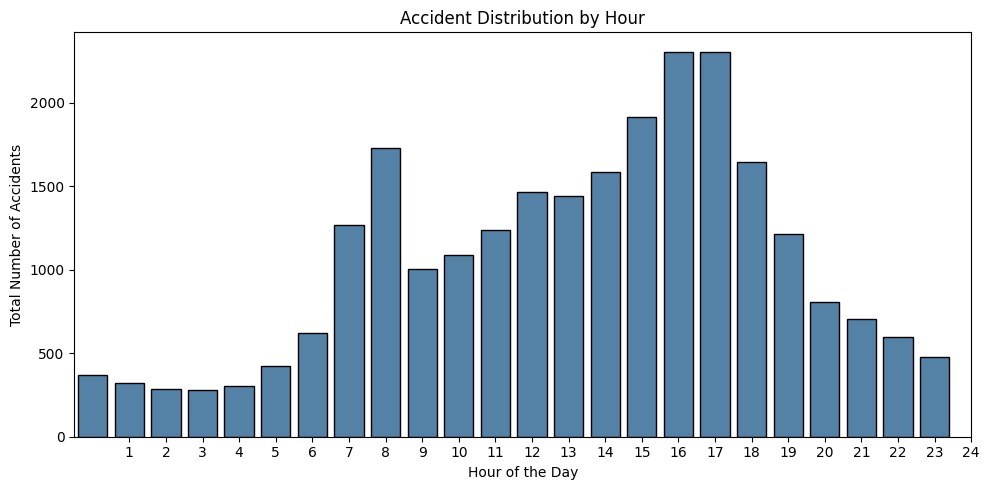

In [11]:
plot_accidents_by_hour(
    df=d_clean,
    hour_col="DT_HOUR",
    value_col="MS_ACCT"
)

Here, we observe two abnormal peaks, occurring around 8–9 AM and 5–6 PM. These times correspond to the typical hours when people commute to work and return home on weekdays, confirming the intuition that commuting increases the risk of car accidents.

As expected, we observe that accidents are more likely to happen during the day than at night:

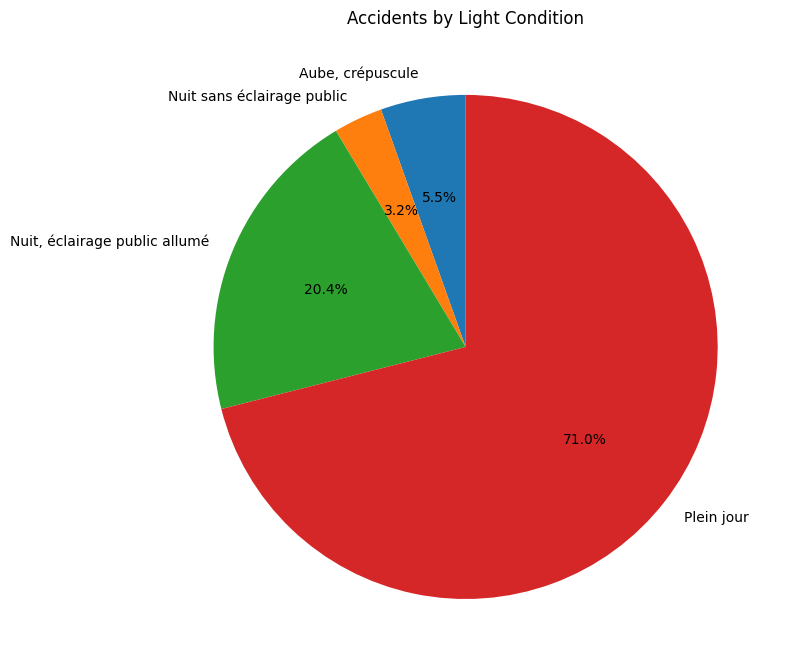

In [12]:
plot_accidents_by_light_condition(
    df=d_clean,
    light_col="TX_LIGHT_COND_DESCR_FR",
    value_col="MS_ACCT",
)

However, even though the number of accidents is significantly higher during the day, this is somewhat expected, as people are more active and traffic is heavier. Ultimately, when analyzing road accidents, the key factor to consider is their severity: while a high number of minor accidents is a concern, it is still preferable to severe accidents that can result in fatalities.

When comparing deaths occurring during the day and at night, the most relevant aspect is therefore the distribution of accident by severity for each time of the day.

<Figure size 1000x600 with 0 Axes>

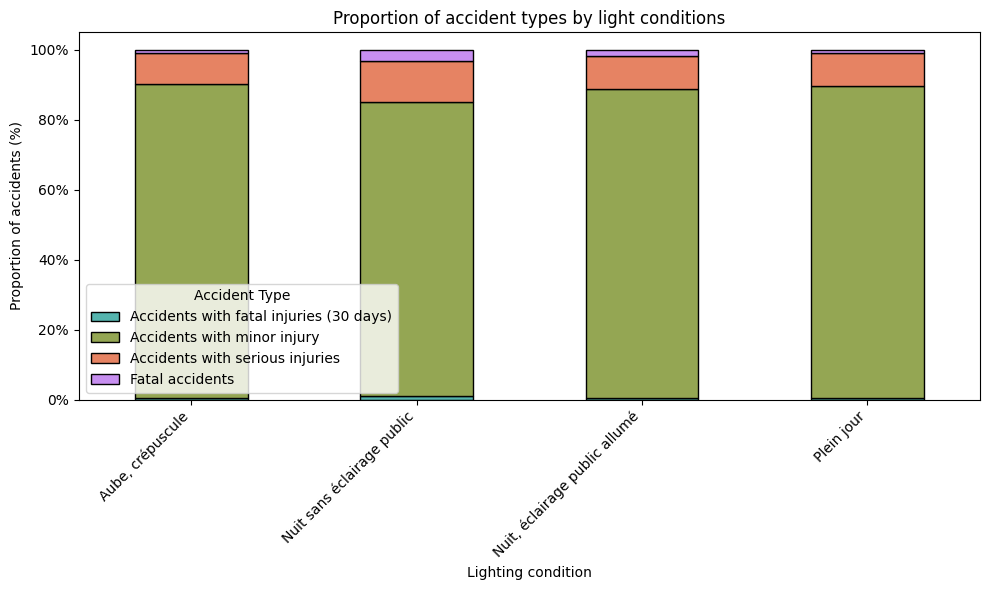

In [13]:
plot_accident_severity_by_light_condition(
    df=d_clean,
    light_col="TX_LIGHT_COND_DESCR_FR",
)

We can therefore observe that, overall, accident severity remains similar across broad daylight, nighttime roads with public lighting, and sunrise or sunset periods. The difference arises in nighttime travel on roads without public lighting, where the proportion of accidents resulting in fatal or serious injuries is higher.

Once again, this outcome is not entirely unexpected.

### Variable Selection

As mentioned earlier, this study aims to assess the key factors leading to a higher number of accidents in Belgium to develop data-driven policy recommendations. Therefore, in our model, the dependent variable $Y$ should logically be the number of accidents (*MS_ACCT*).

Based on the previous analysis, the relevant independent variables $X$ that we retain for our regression model are the following:
- ***DT_HOUR* (Hour of the day):** As observed, the number of accidents varies significantly depending on the time of day.
- ***WEEKEND* (Weekend or Weekday):** The precise date of each observation is of limited relevance for a country-level analysis. Similarly, differences across individual weekdays are not highly significant, with notable variations mainly occurring between weekdays and weekends. Therefore, this variable is the most relevant in terms of temporality.
- ***BUILD_UP_AREA* (Urban or rural area):** We hypothesized that location matters depending on the purpose of travel (long-distance vs. commuting). Thus, this variable is relevant for assessing this phenomenon.
- ***ROAD_TYPE* (Highway or Regional road):** This variable complements *BUILD_UP_AREA* in evaluating the effect of travel purpose.
- ***CD_LIGHTNING_COND* (Lighting Condition):** This variable helps determine whether the accident occurred during the day or at night, providing insights into road traffic conditions.
- ***CD_PROV_REFNIS* (Province):** Finally, we consider location differences to propose potential local policies. The number of regions (3) was too low to draw meaningful conclusions, while the number of municipality (580) was too high to implement relevant policies. Therefore, provinces (11 in total) appear to be the most suitable alternative.

We deliberately chose not to include collision type in our model, as this variable already assumes the occurrence of an accident and is therefore not relevant for our analysis. It would have been useful if we were examining the relationship between collision type and accident severity, but not in this case.

## Regression Model

### Model Specification

We intend to use a **Poisson regression model** as it is the most appropriate for analyzing the number of accidents (*MS_ACCT*). Since our dependent variable represents **count data**, Poisson regression ensures that predictions remain non-negative and properly reflect accident frequencies. Unlike OLS, which assumes a continuous outcome variable, Poisson is specifically designed for discrete events like accident occurrences. Furthermore, Poisson regression assumes that the mean and variance of accident counts are equal **(E(Y) = Var(Y))**, which we will have to verify (*cf. Assumption Check*). If we detect overdispersion (variance significantly greater than the mean), we will consider using a **Negative Binomial regression** instead.

Our final regression equation is specified as:
$$
\log(E(\text{MS\_ACCT})) = \beta_0 + \beta_1 \text{DT\_HOUR} + \beta_2 CD\_WEEKEND + \beta_3 CD\_BUILD\_UP\_AREA + \beta_4 CD\_ROAD\_TYPE + \beta_5 CD\_LIGHT\_COND + \beta_6 CD\_PROV\_REFNIS + u
$$

where:
- $\beta_0$ is the intercept,
- $DT\_HOUR$ represents the hour of the day,
- $CD\_WEEKEND$ is a binary variable indicating weekends,
- $CD\_BUILD\_UP\_AREA$ represents whether the accident occurred in a built-up area,
- $CD\_ROAD\_TYPE$ categorizes the type of road,
- $CD\_LIGHT\_COND$ represents lighting conditions,
- $CD\_PROV\_REFNIS$refers to the provincial reference code,
- $u$ is the error term.

This model will allow us to estimate how different factors affect accident frequency.

### Database adaptation

First, let’s modify the dataset to better fit our regression model. To begin, we will encode the variable *WEEKEND* so that it can be used in the regression model as follows:
- Weekday = 1
- Weekend = 2

In [14]:
# We create a copy to avoid warning.
d_clean = d_clean.copy()

d_clean["CD_WEEKEND"] = d_clean["TX_DAY_OF_WEEK_DESCR_FR"].apply(lambda x: 2 if x in ["Samedi", "Dimanche"] else 1)

We will now isolate the relevant variables to produce a final version of the dataset, with non-essential variables removed.

In [15]:
d_final = d_clean[["MS_ACCT", "DT_HOUR", "CD_WEEKEND", "CD_BUILD_UP_AREA", 
                   "CD_ROAD_TYPE", "CD_LIGHT_COND", "CD_PROV_REFNIS"]]

Finally, we will aggregate the data from the dependent variable $Y$ (*MS_ACCT*) and group it according to all other factors to obtain the annual number of accidents for each $X_i$.

In [16]:
d_final = d_final.groupby(
    ["DT_HOUR", "CD_WEEKEND", "CD_BUILD_UP_AREA", 
     "CD_ROAD_TYPE", "CD_LIGHT_COND", "CD_PROV_REFNIS"], as_index=False
)["MS_ACCT"].sum()

Below is a small sample of how the data looks.

In [17]:
display(d_final.head())

,DT_HOUR,CD_WEEKEND,CD_BUILD_UP_AREA,CD_ROAD_TYPE,CD_LIGHT_COND,CD_PROV_REFNIS,MS_ACCT
0,1,1,1.0,2.0,1.0,70000.0,1
1,1,1,1.0,2.0,3.0,10000.0,11
2,1,1,1.0,2.0,3.0,20001.0,12
3,1,1,1.0,2.0,3.0,20002.0,5
4,1,1,1.0,2.0,3.0,30000.0,8


### Assumption Check

As mentionned earlier, the poisson regression model holds only if the following assumption is verified:
$E(Y)=Var(Y)$

The mean and variance of accident counts are equal (**E(Y) = Var(Y)**). If we detect overdispersion (variance significantly greater than the mean), we will consider using a **Negative Binomial regression** instead.

To check this assumption, let’s compute the mean and the variance of the accident counts.

In [18]:
mean_value = d_final["MS_ACCT"].mean()
print(mean_value)

10.094632206759444


In [19]:
variance_value = d_final["MS_ACCT"].var()
print(variance_value)

399.27584627477773


We observe that **Var(Y) >> E(Y)**, suggesting that the Negative Binomial regression is the most suitable alternative between the two options.

To confirm this decision, we can perform an **Akaike Information Criterion (AIC)** comparison between the two models: if the Negative Binomial model has a lower AIC than the Poisson regression model, it confirms that the Negative Binomial model is the better choice.

Before conducting this AIC comparison, let’s first define our two regression models, starting by indicating that the variables we are regressing are categorical.

In [20]:
d_final = d_final.astype({
    "DT_HOUR": "category",
    "CD_WEEKEND": "category",
    "CD_BUILD_UP_AREA": "category",
    "CD_ROAD_TYPE": "category",
    "CD_LIGHT_COND": "category",
    "CD_PROV_REFNIS": "category"
})

print(d_final.dtypes)

DT_HOUR             category
CD_WEEKEND          category
CD_BUILD_UP_AREA    category
CD_ROAD_TYPE        category
CD_LIGHT_COND       category
CD_PROV_REFNIS      category
MS_ACCT                int64
dtype: object


We will then define our two regression models as follows:
- **Poisson Regression Model:**

In [21]:
poisson_model = smf.glm(
    formula="MS_ACCT ~ DT_HOUR + CD_WEEKEND + CD_BUILD_UP_AREA + CD_ROAD_TYPE + CD_LIGHT_COND + CD_PROV_REFNIS",
    data=d_final,
    family=sm.families.Poisson(link=sm.families.links.Log())
).fit()

- **Negative Binomiale Model:**

In [22]:
mu = poisson_model.fittedvalues  
residuals = d_final["MS_ACCT"] - mu  
alpha = ((residuals**2 / mu) - 1).mean()  

# We ajuste the Negative Binomiale model the the alpha calculated above.
nb_model = smf.glm(
    formula="MS_ACCT ~ DT_HOUR + CD_WEEKEND + CD_BUILD_UP_AREA + CD_ROAD_TYPE + CD_LIGHT_COND + CD_PROV_REFNIS",
    data=d_final,
    family=sm.families.NegativeBinomial(alpha=alpha) 
).fit()

We can now compare the AIC results for both models:

In [23]:
compare_models_aic(poisson_model, nb_model, name1="Poisson", name2="Negative Binomial")

AIC - Poisson: 18789.49
AIC - Negative Binomial: 17056.88
→ Negative Binomial has a lower AIC and is preferred.


We observe that **AIC(nb_model) < AIC(poisson_model)**, as 17,056.88 < 18,789.49. The lower AIC value in the Negative Binomial model confirms that it provides a better fit to the data.

Finally, to statistically validate this choice, a **Likelihood Ratio Test** will confirm the improvement if the test’s p-value < 0.05:

In [24]:
likelihood_ratio_test(poisson_model, nb_model, name1="Poisson", name2="Negative Binomial")

Likelihood Ratio Test: 'Poisson' vs. 'Negative Binomial'
→ LR Statistic: 1732.61
→ Degrees of Freedom: 1
→ p-value: 0.00000
→ 'Negative Binomial' significantly improves model fit over 'Poisson' (p < 0.05).


Here, we observe that p-value < 0.05.

The very low p-value (< 0.001 level) means the improvement is statistically significant. Negative Binomial model fits the data much better than Poisson Regression Model.

## Estimation Results

Here are the results of the model:

In [25]:
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                MS_ACCT   No. Observations:                 2515
Model:                            GLM   Df Residuals:                     2476
Model Family:        NegativeBinomial   Df Model:                           38
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8489.4
Date:                Thu, 27 Mar 2025   Deviance:                       394.64
Time:                        21:10:52   Pearson chi2:                     397.
No. Iterations:                    16   Pseudo R-squ. (CS):             0.2668
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The regression results provide insights into the factors influencing the number of road accidents in Belgium, considering time of day, weekend effects, urbanization, road types, lighting conditions, and provincial differences.

### Statistical Significance

The p-values indicate which coefficients are statistically significant. A p-value < 0.05 suggests strong statistical significance, meaning the variable has a meaningful impact on accident counts. The estimated coefficients represent log-changes in the expected number of accidents due to a one-unit change in the predictor.

We can therefore observe the following effect:
- **Time of Day (*DT_HOUR*):** Several hours show strong significance, especially during peak traffic times.
- **Weekend Effect (*CD_WEEKEND*):** Highly significant with a strong negative effect, meaning fewer accidents on weekends.
- **Urbanization (*CD_BUILD_UP_AREA*):** Significant negative effect, meaning urban areas have higher accident rates.
- **Road Type (*CD_ROAD_TYPE*):** Strong positive effect, meaning regional roads have more accidents than highways.
- **Lighting Conditions (*CD_LIGHT_COND*):** All categories show strong significance, with night driving without streetlights being the most dangerous.
- **Provincial Effects (*CD_PROV_REFNIS*):** Large variation across regions, some showing significantly higher accident rates.

### Interpretation of Keys Results

Several conclusion can be drawn from these results.

#### Effect of Time of Day
The coefficients for *DT_HOUR* suggest a pattern where accidents are more frequent at certain times. Early morning hours (*DT_HOUR* 2-6) show negative coefficients, indicating fewer accidents, while accidents peak between *DT_HOUR* 8-16, with the highest impact occurring between noon and early afternoon.

For instance, let's consider the coefficient for *DT_HOUR 16*. The coefficient is 0.9668 (p < 0.01), meaning that at 16:00, the expected number of accidents is $e^{0.9668}$ times higher compared to the reference hour. Let's compute :

In [26]:
result = math.exp(0.9668)
result

2.629516528964675

The expected number of accidents is 2.63 times higher compared to the reference hour.

Similarly, *DT_HOUR 12* has a coefficient of 0.6566:

In [27]:
result = math.exp(0.6566)
result

1.9282252109013434

This means that accidents are about 2 times higher ($e^{0.694} \simeq 2.00$) than at the reference hour (01:00pm).

#### Weekend vs. Weekday Differences
The coefficient for *CD_WEEKEND 2* is -0.6804 (p < 0.0001): 

In [28]:
result = math.exp(-0.6804)
result

0.5064143860925994

The expected number of accidents on weekends is approximately 49% lower than on weekdays. This suggests that work-related and commuting accidents contribute substantially to total accident counts, as traffic volume is typically higher on weekdays due to commuting patterns.

#### Impact of Urbanization
The negative coefficient for *CD_BUILD_UP_AREA 2* (-0.2139, p < 0.05) suggests that accidents occur less frequently outside urban areas compared to urban areas (the reference category).

In [29]:
result = math.exp(-0.2139)
result

0.8074291238980602

This coefficient suggests a 19% reduction in accidents in rural areas compared to urban areas, holding all other factors constant.

The lower accident count in rural areas is likely due to lower traffic density, fewer intersections, and fewer pedestrians.

#### Road Type Differences
The coefficient for *CD_ROAD_TYPE 2* is 1.0825 (p < 0.0001):

In [30]:
result = math.exp(1.0825)
result

2.952050459740016

This indicates that accidents on regional roads are 3 times more likely than on highways. This could be due to more intersections, pedestrian activity, or lower enforcement of traffic rules.

#### Effect of Lighting Conditions
The estimated coefficients for *CD_LIGHT_COND* represent the log change in expected accident counts compared to the reference category (daylight, *CD_LIGHT_COND 1*). We have:
- ***CD_LIGHT_COND 2*** = -1.3146
- ***CD_LIGHT_COND 3*** = -0.4709
- ***CD_LIGHT_COND 4*** = -1.4568

In [31]:
result1 = math.exp(-1.3146)
result2 = math.exp(-0.4709)
result3 = math.exp(-1.4568)
print(result1)
print(result2)
print(result3)

0.2685817344493422
0.6244400192912444
0.23298062112795564


Since the model uses a log-link function, we exponentiate the coefficients to obtain the incident rate ratio, which tells us how accident rates change under different lighting conditions relative to daylight:

- **Twilight hours (*CD_LIGHT_COND 2*):** The expected accident count is 0.27 that of daylight.This means accidents occur 72% less frequently than in daylight.
- **Night with public lighting (*CD_LIGHT_COND 3*):** The expected accident count is 0.62 that of daylight.This means accidents occur 38% less frequently than in daylight.
- **Night without public lighting (*CD_LIGHT_COND 4*):** The expected accident count is 0.23 that of daylight. This means accidents occur 77% less frequently than in daylight.

At first glance, these negative coefficients might suggest that accidents decrease in low-light conditions, but this likely reflects a reduction in overall traffic volume rather than increased safety. Fewer vehicles on the road at night naturally reduce accident occurrences.

#### Regional Effects
The provincial dummies (*CD_PROV_REFNIS*) show strong variation across regions: some provinces have significantly lower accident rates, such as *CD_PROV_REFNIS20002* (Province du Brabant Wallon) (-1.3286, p < 0.0001), indicating that region-specific factors (e.g., road quality, enforcement levels) influence accident risks.

## Model Diagnostics and Robustness Checks
### Pseudo $R^2$ Results
Unlike OLS regression, where $R^2$ directly measures the proportion of variance explained, we use pseudo $R^2$ values to provide alternative ways to assess model fit in the case of a Negative Binomial model.

In [32]:
compute_pseudo_r2(nb_model, model_name="Negative Binomial")

,Model,Metric,Value
0,Negative Binomial,r2ML,0.930794
1,Negative Binomial,r2CU,0.754531


**Maximum Likelihood $R^2$ & Cragg-Uhler $R^2$:** These values are closer to the traditional OLS $R^2$.
A value between 0.75-0.93 means the model explains approximately 75-93% of the variation in accident counts, which indicates a strong model fit.

### Check for Multicollinearity
Since multicollinearity can inflate standard errors and reduce interpretability, we need to verify its presence in our model. Given that all our variables are categorical, we will compute the Variance Inflation Factor (VIF).

A VIF value between 1 and 2 indicates the absence of significant multicollinearity, whereas a value greater than 10 suggests strong multicollinearity between variables.

In [33]:
features = ["DT_HOUR", "CD_WEEKEND", "CD_BUILD_UP_AREA", "CD_ROAD_TYPE", "CD_LIGHT_COND", "CD_PROV_REFNIS"]
compute_vif(d_final, features)

,Variable,VIF
0,const,64.017465
1,DT_HOUR,1.012732
2,CD_WEEKEND,1.003003
3,CD_BUILD_UP_AREA,1.214528
4,CD_ROAD_TYPE,1.232946
5,CD_LIGHT_COND,1.021568
6,CD_PROV_REFNIS,1.009670


With a highest VIF value being 1.23, the test results show that there is no significant multicollinearity in the model.

## Conclusion & Policy Recommandation

This study has analyzed the determinants of road accidents in Belgium, identifying key factors that contribute to variations in accident risk. The findings highlight several common trends across all observations. Traffic density, commuting patterns, and peak travel hours significantly increase accident risk. Accidents are notably higher during weekday commuting periods, especially between 08:00 and 16:00, reflecting the impact of work-related travel. Regional roads are far more accident-prone than highways, likely due to more intersections, pedestrian presence, and lower enforcement of traffic laws. Additionally, lighting conditions influence accident occurrence, with accidents appearing to decrease at night—though this is likely due to lower traffic volumes rather than improved safety.

### Policy Recommendations

To mitigate these risks, we propose the following targeted policy interventions:

##### 1. Traffic Management and Peak Hour Safety Measures
- **Enhance traffic enforcement during peak hours** (08:00–16:00) through increased police presence, automated speed enforcement, and stricter penalties for reckless driving.
- **Promote flexible work hours** and **remote work policies** to reduce congestion during commuting periods and distribute traffic more evenly throughout the day.
##### 2. Infrastructure Improvements on Regional Roads
- **Upgrade regional road infrastructure**, including better road signage, enhanced pedestrian crossings, and stricter enforcement of speed limits.
- **Improve road lighting** in critical high-risk areas, particularly where accidents remain frequent despite reduced traffic volumes.
##### 3. Visibility and Nighttime Road Safety Initiatives
- **Expand public lighting** in poorly lit rural areas and conduct regular maintenance of existing lighting infrastructure.
- **Encourage the use of reflective gear** for pedestrians and cyclists to improve visibility during low-light conditions.
- **Introduce nighttime speed limits** and adapt road markings for better visibility at night.

### Limitations and Recommendations for Further Study

There are several limitations to this study that should be acknowledged. One key limitation is the absence of certain important variables. The model does not account for **weather conditions**, which are known to influence accident rates significantly. Factors such as rain, fog, and icy roads can substantially increase accident risk, and their exclusion may affect the accuracy of the findings. Additionally, **speeding behavior** is not included in the analysis, even though excessive speed is a major contributor to severe road accidents. The model also lacks traffic density data, which could provide a more precise understanding of congestion levels and their relationship with accident occurrences at different locations and times.

Beyond missing variables, there are also some limitations in interpretation. Although the results indicate that accidents are less frequent at night, this does not necessarily imply that night driving is safer. Accidents occurring at night may, in fact, be **more severe** due to higher driving speeds and longer emergency response times. Similarly, while the analysis shows that highways have fewer accidents than regional roads, this does not mean highways are safer overall. The higher speed limits on highways may result in more fatal accidents, even if the total number of crashes is lower.

To enhance the robustness of future research, additional variables and methodologies should be incorporated. Future studies should include **accident severity data** to provide a more nuanced understanding of road safety beyond accident frequency alone. Moreover, incorporating vehicle type and driver behavior factors (such as driver age, experience, and potential distractions) could help refine policies aimed at reducing road accident risks. Expanding the scope of analysis to account for these factors would allow for a more comprehensive understanding of accident patterns and enable more targeted policy interventions.

### Final Thoughts

This study confirms that road accidents are primarily driven by traffic patterns, commuting behaviors, and infrastructure quality. While policies targeting peak-hour traffic enforcement, improved regional road conditions, and enhanced nighttime visibility can significantly reduce accident risk, future research should consider accident severity and additional risk factors to develop even more effective safety measures.

Safer roads require **data-driven policies**, **proactive urban planning**, and **continuous improvements to infrastructure and traffic management**.

## References

**Boufous, S., & Williamson, A. (2009).** *Factors affecting the severity of work-related traffic crashes in drivers receiving a worker’s compensation claim.*

**Elvik, R. (2013).** *Risk of road accident associated with the use of drugs: A systematic review and meta-analysis of evidence from epidemiological studies.*

**Wang, C., Quddus, M. A., & Ison, S. G. (2013).** *The effect of traffic and road characteristics on road safety: A review and future research direction.*

**Sullivan, J. M., & Flannagan, M. J. (2002).** *The role of ambient light level in fatal crashes: Inferences from daylight saving time transitions.*

**Zou, Y., Zhang, Y., Lord, D., & Peng, Y. (2017).** *Application of finite mixture of negative binomial regression models with varying weight parameters for vehicle crash data analysis.*

**Haque, M. M., Chin, H. C., & Huang, H. (2010).** *Modeling fault among motorcyclists involved in crashes.*

**Lord, D., Washington, S. P., & Ivan, J. N. (2005).** *Poisson, Poisson-gamma and zero-inflated regression models of motor vehicle crashes: Balancing statistical fit and theory.*

**Savolainen, P. T., Mannering, F. L., Lord, D., & Quddus, M. A. (2011).** *The statistical analysis of highway crash-injury severities: A review and assessment of methodological alternatives.*

## Appendix

### Appendix 1

- **DAY OF WEEK:**

In [34]:
DAY = d[["CD_DAY_OF_WEEK", "TX_DAY_OF_WEEK_DESCR_FR"]].drop_duplicates().sort_values(by="CD_DAY_OF_WEEK")
DAY.style.format()

,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_FR
1,1,Lundi
2,2,Mardi
8,3,Mercredi
4,4,Jeudi
3,5,Vendredi
9,6,Samedi
0,7,Dimanche


- **BUILD UP AREA:**

In [35]:
AREA = d[["CD_BUILD_UP_AREA", "TX_BUILD_UP_AREA_DESCR_FR"]].drop_duplicates().sort_values(by="CD_BUILD_UP_AREA")
AREA.style.format()

,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_FR
1,1.000000,En agglomération
0,2.000000,Hors agglomération
7,nan,Non disponible


- **COLLISION TYPE:**

In [36]:
COLL = d[["CD_COLL_TYPE", "TX_COLL_TYPE_DESCR_FR"]].drop_duplicates().sort_values(by="CD_COLL_TYPE")
COLL.style.format()

,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_FR
43,1.000000,Collision en chaine (entre 4 conducteurs ou plus)
11,2.000000,Collision frontale (ou en croisement)
0,3.000000,Par l'arrière (ou en parallèle)
1,4.000000,Par le côté
21,5.000000,Avec un piéton
173,6.000000,Contre un obstacle situé sur la chaussée
17,7.000000,Contre un obstacle hors de la chaussée
63,8.000000,"Un seul usager, pas d'obstacle"
3,nan,Non disponible


- **LIGHTING CONDITION:**

In [37]:
LIGHT = d[["CD_LIGHT_COND", "TX_LIGHT_COND_DESCR_FR"]].drop_duplicates().sort_values(by="CD_LIGHT_COND")
LIGHT.style.format()

,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_FR
1,1.000000,Plein jour
5,2.000000,"Aube, crépuscule"
0,3.000000,"Nuit, éclairage public allumé"
77,4.000000,Nuit sans éclairage public
7,nan,Non disponible


- **ROAD TYPE:**

In [38]:
ROAD = d[["CD_ROAD_TYPE", "TX_ROAD_TYPE_DESCR_FR"]].drop_duplicates().sort_values(by="CD_ROAD_TYPE")
ROAD.style.format()

,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_FR
0,1.000000,Autoroute
1,2.000000,"Route régionale, provinciale ou communale"
782,nan,Inconnu


- **DISTRICT:**

In [39]:
DSTR = d[["CD_DSTR_REFNIS", "TX_ADM_DSTR_DESCR_FR"]].drop_duplicates().sort_values(by="CD_DSTR_REFNIS")
DSTR.style.format()

,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_FR
0,11000,Arrondissement d’Anvers
4535,12000,Arrondissement de Malines
5446,13000,Arrondissement de Turnhout
6944,21000,Arrondissement de Bruxelles-Capitale
31044,23000,Arrondissement de Hal-Vilvorde
32844,24000,Arrondissement de Louvain
34166,25000,Arrondissement de Nivelles
10690,31000,Arrondissement de Bruges
11850,32000,Arrondissement de Dixmude
11989,33000,Arrondissement d’Ypres


- **PROVINCE:**

In [40]:
PROV = d[["CD_PROV_REFNIS", "TX_PROV_DESCR_FR"]].drop_duplicates().sort_values(by="CD_PROV_REFNIS")
PROV.style.format()

,CD_PROV_REFNIS,TX_PROV_DESCR_FR
0,10000.000000,Province d’Anvers
31044,20001.000000,Province du Brabant flamand
34166,20002.000000,Province du Brabant wallon
10690,30000.000000,Province de Flandre occidentale
14676,40000.000000,Province de Flandre orientale
19751,50000.000000,Province du Hainaut
22247,60000.000000,Province de Liège
25168,70000.000000,Province du Limbourg
27329,80000.000000,Province du Luxembourg
28103,90000.000000,Province de Namur


- **REGION:**

In [41]:
RGN = d[["CD_RGN_REFNIS", "TX_RGN_DESCR_FR"]].drop_duplicates().sort_values(by="CD_RGN_REFNIS")
RGN.style.format()

,CD_RGN_REFNIS,TX_RGN_DESCR_FR
0,2000,Région flamande
19751,3000,Région wallonne
6944,4000,Région de Bruxelles-Capitale


- **MUNICIPALITY:**

In [42]:
MUNTY = d[["CD_MUNTY_REFNIS", "TX_MUNTY_DESCR_FR"]].drop_duplicates().sort_values(by="CD_MUNTY_REFNIS")
MUNTY.style.format()

,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_FR
0,11001,Aartselaar
89,11002,Anvers
2693,11004,Boechout
2736,11005,Boom
2808,11007,Borsbeek
2840,11008,Brasschaat
2997,11009,Brecht
3090,11013,Edegem
3183,11016,Essen
3225,11018,Hemiksem
